In [26]:
import bisect
import math
import matplotlib.pyplot as plt
from util import filetools
from util import unpack
from util import plotter
from util import vectors
%matplotlib inline
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [2]:
datadir = '/home/erubin/thesis/gpfs/experiments/test-mcluster-128k-4node-10-8-20:42:45/'

In [105]:
confs = filetools.get_conf_files(datadir)

In [106]:
df = unpack.DataFile(confs[0]).unpack()

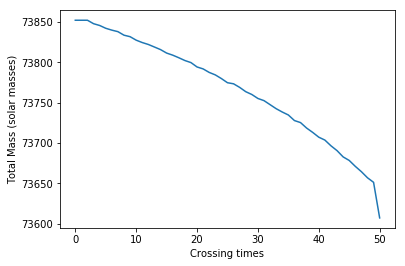

In [19]:
plotter.mass_v_time(datadir)

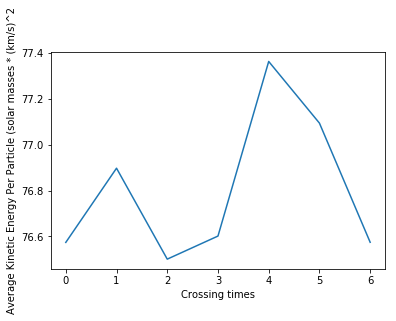

In [108]:
plotter.avg_ke_v_time(data_dir=datadir)

In [37]:
def cumulative_density_profile(datadir, t=0, target=float('inf')):
    initial = filetools.get_conf_files(datadir)[t]
    df = unpack.DataFile(initial).unpack()
    radii = vectors.magnitudes3(df.pos)
    massRad = sorted(list(zip(radii, df.masses)))
    last = bisect.bisect(massRad, (target, 0))
    rad = [pair[0] for pair in massRad[:last]]
    cumMass = [pair[1] for pair in massRad[:last]]
    for i in xrange(1, len(cumMass)):
        cumMass[i] = cumMass[i] + cumMass[i-1]
        
    fig, ax = plt.subplots(1,1)
    ax.loglog(rad, cumMass)
    mtot = "{} solar masses".format(cumMass[-1]*df.to_solar_mass)    
    print "{} stars constituting {} within {} pc of center".format(last, mtot, target)

    

def density_profile(datair, t=0, target=35):
    initial = filetools.get_conf_files(datadir)[t]
    df = unpack.DataFile(initial).unpack()
    radii = vectors.magnitudes3(df.pos)
    massRad = sorted(list(zip(radii, df.masses)))
    last = bisect.bisect(massRad, (target, 0))
    rad = [pair[0] for pair in massRad[:last]]
    cumMass = [pair[1]*df.to_solar_mass for pair in massRad[:last]]
    density = [0 for _ in xrange(0, len(rad))]
    for i in xrange(1, len(cumMass)):
        cumMass[i] = cumMass[i] + cumMass[i-1]
    
    for i in xrange(1, len(cumMass)):
        density[i] = 3.0 * cumMass[i] / (4 * math.pi * rad[i]**3) 
    fig, ax = plt.subplots(1,1)

    plt.loglog(rad, density)    


117066 stars constituting 67580.7089962 solar masses within 5 pc of center
116181 stars constituting 67064.2659844 solar masses within 5 pc of center


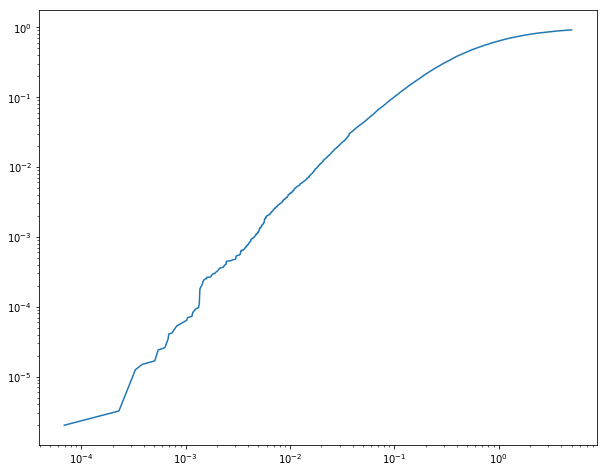

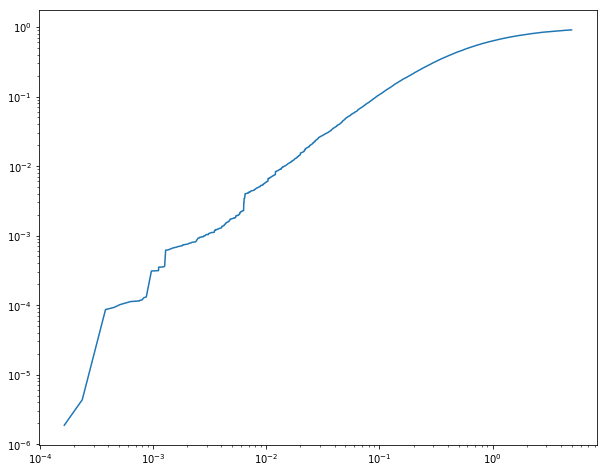

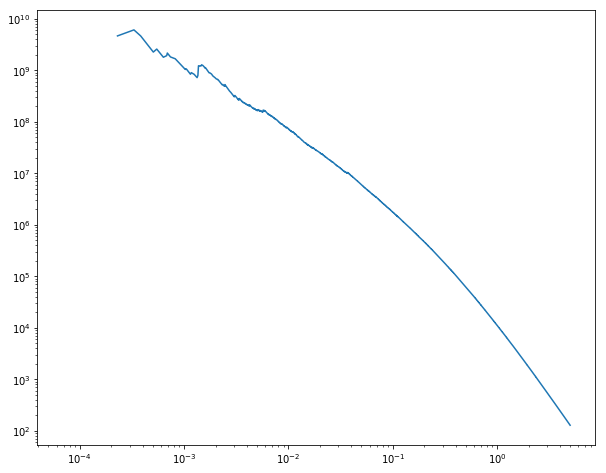

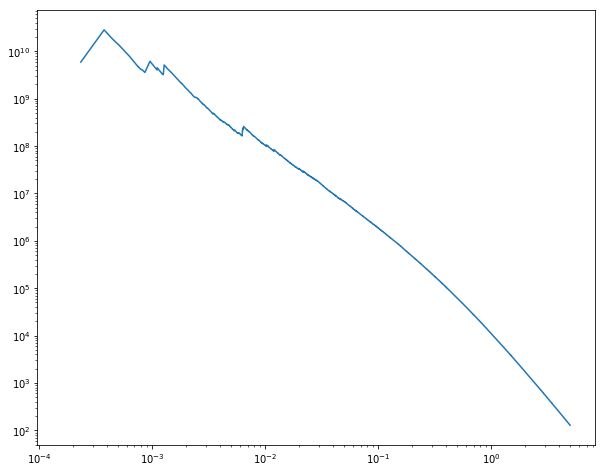

In [38]:
cumulative_density_profile(datadir, t=0, target=5)
cumulative_density_profile(datadir, t=50, target=5)

density_profile(datadir, t=0, target=5)
density_profile(datadir, t=50, target=5)

In [32]:
def mass_within_v_time(datadir, radius=0.001):
    
    masses = []
    times = []
    for conf in filetools.get_conf_files(datadir):
        df = unpack.DataFile(conf).unpack()
        radii = vectors.magnitudes3(df.pos)
        massRad = sorted(list(zip(radii, df.masses)))
        last = bisect.bisect(massRad, (radius, 0))
        rad = [pair[0] for pair in massRad[:last]]
        cumMass = [pair[1] for pair in massRad[:last]]
        for i in xrange(1, len(cumMass)):
            cumMass[i] = cumMass[i] + cumMass[i-1]
            
        masses.append(cumMass[-1]*df.to_solar_mass)
        times.append(df.header2['time[nb]'] * df.to_myr)
        
    
    fig, ax = plt.subplots(1,1)
    ax.plot(times, masses)
    

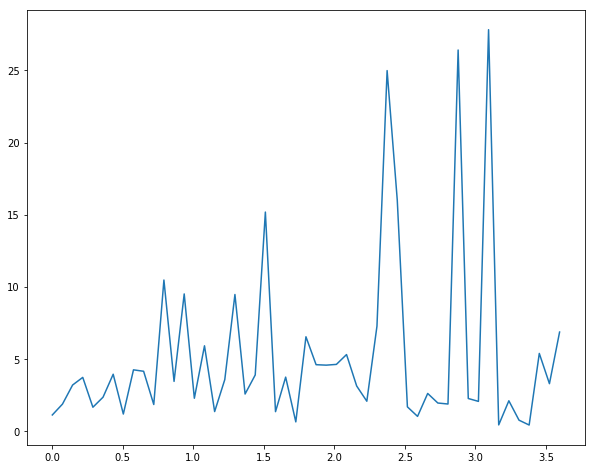

In [40]:
mass_within_v_time(datadir, 5e-4)